In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
%matplotlib inline

In [2]:
from google.colab import files
uploaded = files.upload()

Saving classified-data.csv to classified-data.csv


In [3]:
import io
df = pd.read_csv(io.BytesIO(uploaded['classified-data.csv']))

In [4]:
df.head()

,Customer ID,Name,Gender,Age,Income (USD),Income Stability,Profession,Type of Employment,Location,Loan Amount Request (USD),Current Loan Expenses (USD),Expense Type 1,Expense Type 2,Dependents,Credit Score,No. of Defaults,Has Active Credit Card,Property ID,Property Age,Property Type,Property Location,Co-Applicant,Property Price,Loan Sanction Amount (USD)
0,C-36995,Frederica Shealy,F,56,1933.05,Low,Working,Sales staff,Semi-Urban,72809.58,241.08,N,N,3.0,809.44,0,NaN,746,1933.05,4,Rural,1,119933.46,54607.18
1,C-33999,America Calderone,M,32,4952.91,Low,Working,NaN,Semi-Urban,46837.47,495.81,N,Y,1.0,780.40,0,Unpossessed,608,4952.91,2,Rural,1,54791.00,37469.98
2,C-3770,Rosetta Verne,F,65,988.19,High,Pensioner,NaN,Semi-Urban,45593.04,171.95,N,Y,1.0,833.15,0,Unpossessed,546,988.19,2,Urban,0,72440.58,36474.43
3,C-26480,Zoe Chitty,F,65,NaN,High,Pensioner,NaN,Rural,80057.92,298.54,N,Y,2.0,832.70,1,Unpossessed,890,NaN,2,Semi-Urban,1,121441.51,56040.54
4,C-23459,Afton Venema,F,31,2614.77,Low,Working,High skill tech staff,Semi-Urban,113858.89,491.41,N,Y,NaN,745.55,1,Active,715,2614.77,4,Semi-Urban,1,208567.91,74008.28


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 24 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Customer ID                  30000 non-null  object 
 1   Name                         30000 non-null  object 
 2   Gender                       29947 non-null  object 
 3   Age                          30000 non-null  int64  
 4   Income (USD)                 25424 non-null  float64
 5   Income Stability             28317 non-null  object 
 6   Profession                   30000 non-null  object 
 7   Type of Employment           22730 non-null  object 
 8   Location                     30000 non-null  object 
 9   Loan Amount Request (USD)    30000 non-null  float64
 10  Current Loan Expenses (USD)  29828 non-null  float64
 11  Expense Type 1               30000 non-null  object 
 12  Expense Type 2               30000 non-null  object 
 13  Dependents      

In [6]:
df.shape

(30000, 24)

In [7]:
df.dtypes

Customer ID                     object
Name                            object
Gender                          object
Age                              int64
Income (USD)                   float64
Income Stability                object
Profession                      object
Type of Employment              object
Location                        object
Loan Amount Request (USD)      float64
Current Loan Expenses (USD)    float64
Expense Type 1                  object
Expense Type 2                  object
Dependents                     float64
Credit Score                   float64
No. of Defaults                  int64
Has Active Credit Card          object
Property ID                      int64
Property Age                   float64
Property Type                    int64
Property Location               object
Co-Applicant                     int64
Property Price                 float64
Loan Sanction Amount (USD)     float64
dtype: object

# Exploratory Data Analysis


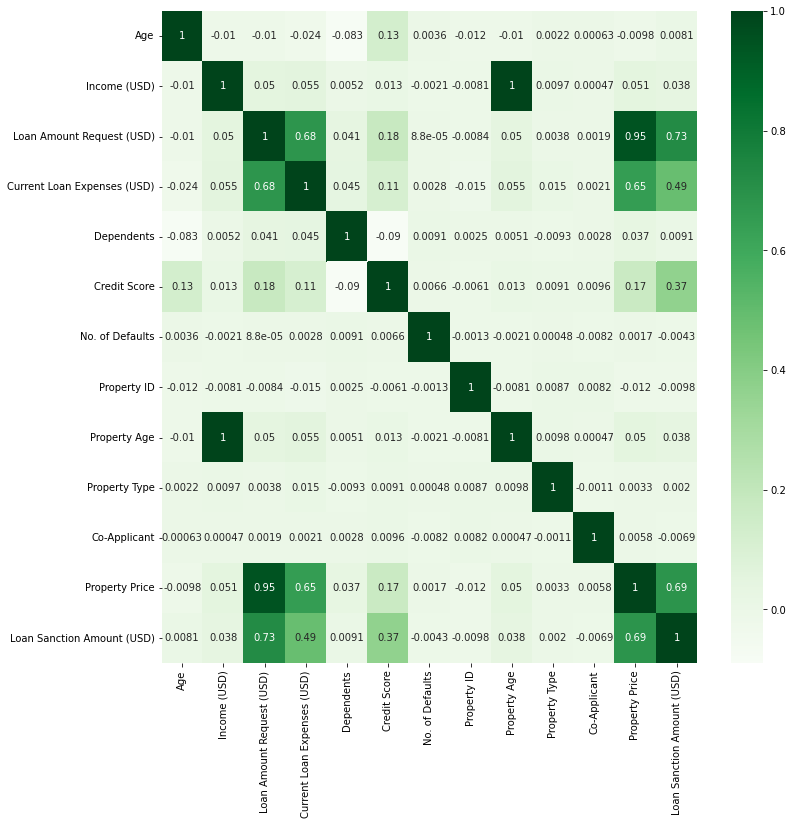

In [8]:
plt.figure(figsize=(12,12))
sns.heatmap(df.corr(),cmap='Greens',annot=True)

### The heat map above shows us that,


*   Property Price is directly proportional to Loan Amount Request, and it is closely related
*   Loan Sanction Amount is directly proportional to Loan Amount Request
*   Loan Sanction Amount is directly proportional to Current Loan Expenses
*   Loan Sanction Amount is directly proportional to Credit Score, but not so closely related.
*   Loan Sanction Amount is directly proportional to Property Price and is also closely related.
*   Another observation that can be made is, the values in Income (USD) and Property Age are one and the same.



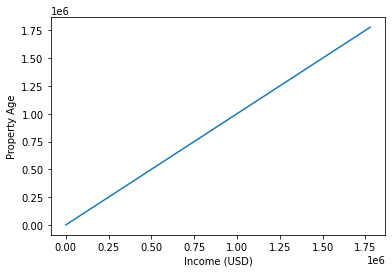

In [9]:
sns.lineplot(data = df, x = "Income (USD)",y="Property Age")

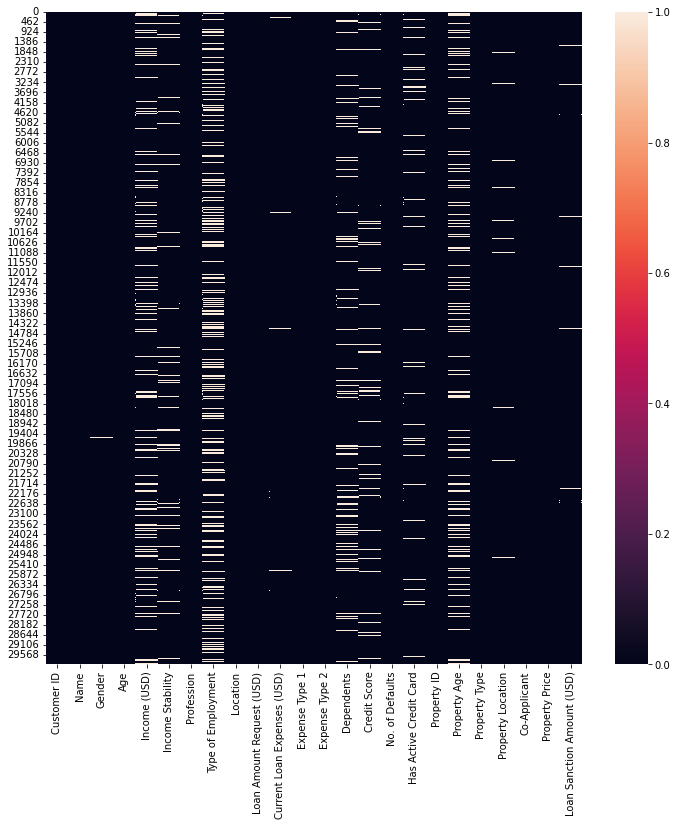

In [10]:
#A plot to show which columns have null values.
plt.figure(figsize=(12,12))
sns.heatmap(df.isnull())

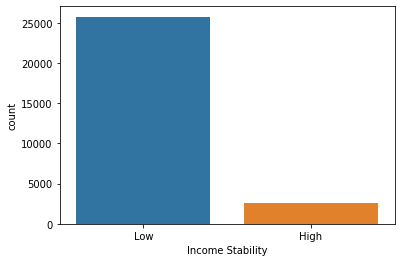

In [11]:
sns.countplot(x = 'Income Stability',data = df)

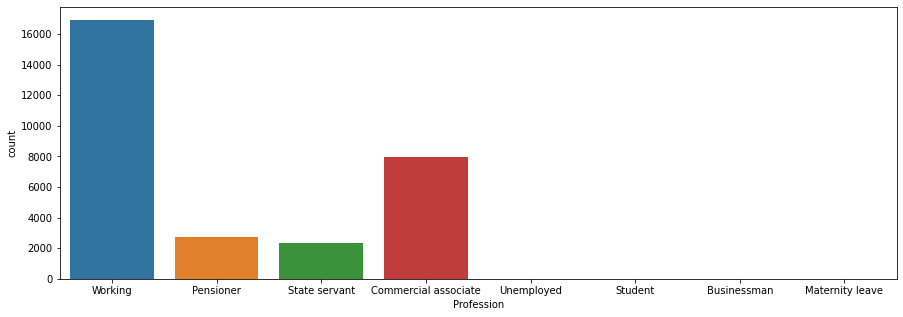

In [12]:
fig =plt.figure(figsize=(15,5))
sns.countplot(x = 'Profession', data = df)

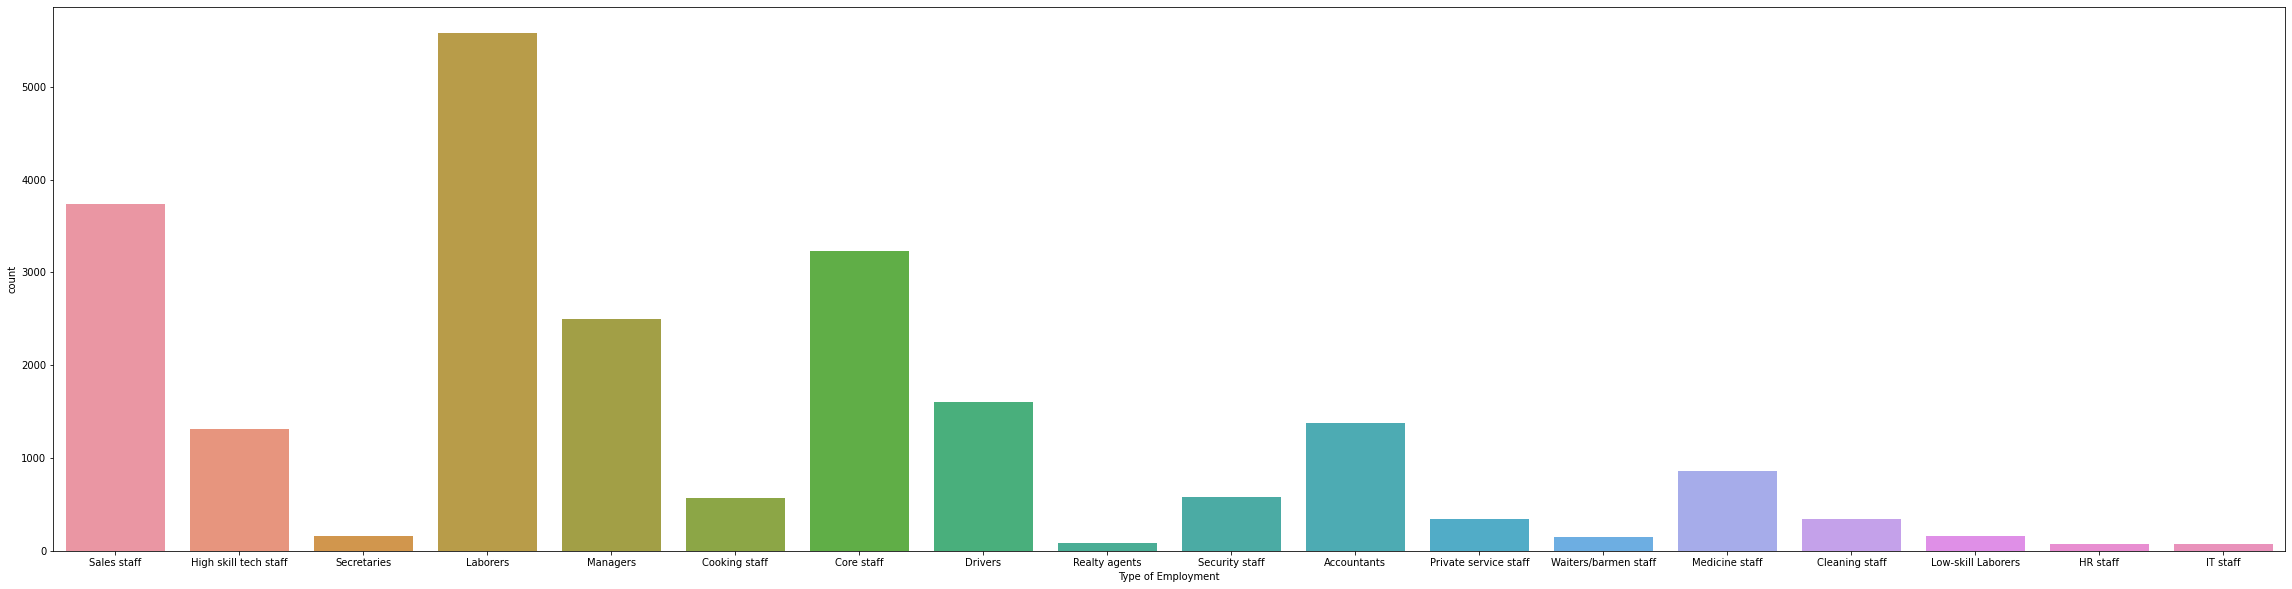

In [14]:
fig = plt.figure(figsize=(40,10))
sns.countplot(x = 'Type of Employment', data = df)

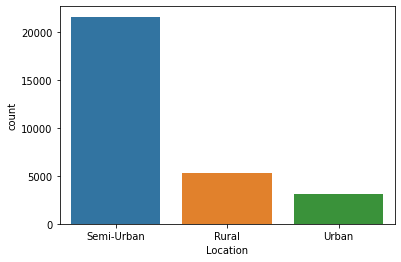

In [15]:
sns.countplot(x = 'Location', data = df)

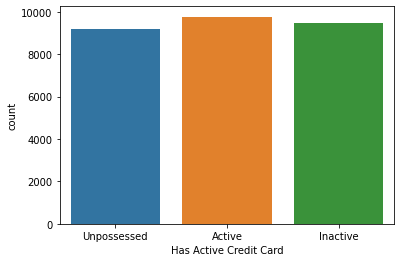

In [16]:
sns.countplot(x = 'Has Active Credit Card', data =df)

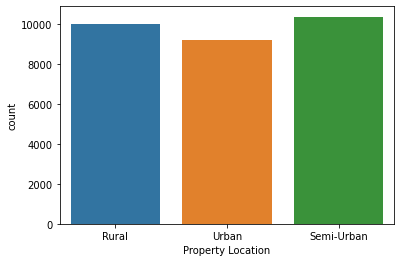

In [17]:
sns.countplot(x = 'Property Location', data=df)

In [18]:
feature_num = [feature for feature in df.columns if df[feature].dtypes != 'O']
discreet_feature = [feature for feature in feature_num if len(df[feature].unique()) < 25]

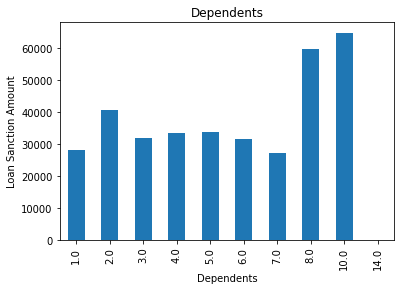

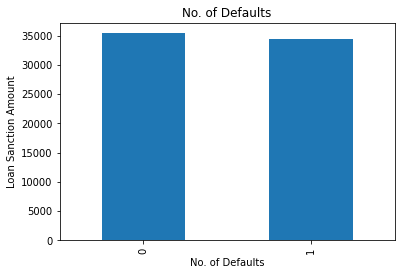

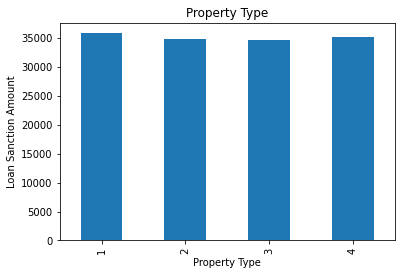

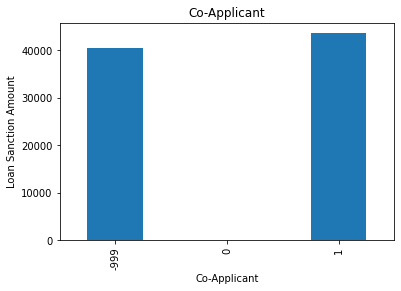

In [19]:
for feature in discreet_feature:
    data= df.copy()
    
    data.groupby(feature)['Loan Sanction Amount (USD)'].median().plot.bar()
    plt.ylabel('Loan Sanction Amount')
    plt.title(feature)
    plt.show()

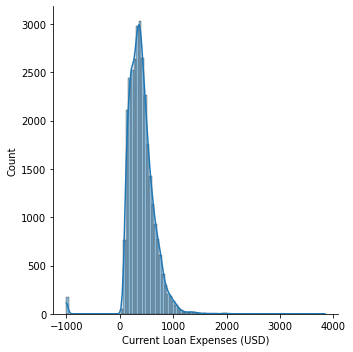

In [20]:
sns.displot(data = df, x = 'Current Loan Expenses (USD)', kde = True, bins=100)

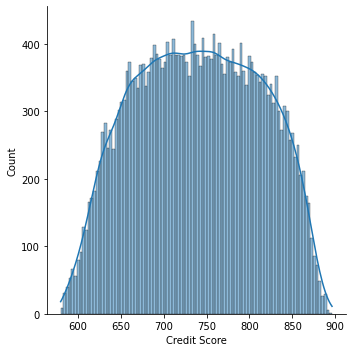

In [21]:
sns.displot(data = df, x = 'Credit Score', kde = True, bins=100)

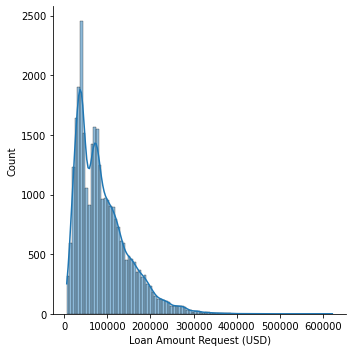

In [22]:
sns.displot(data = df, x = 'Loan Amount Request (USD)', kde = True, bins=100)

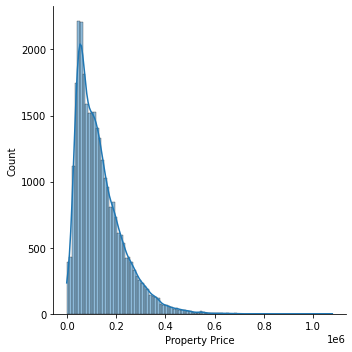

In [23]:
sns.displot(data = df, x = 'Property Price', kde = True, bins=100)

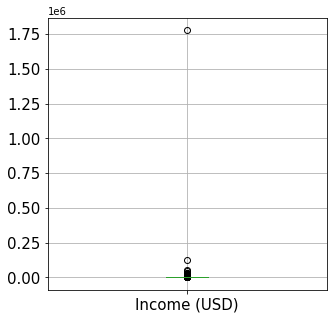

In [24]:
df.boxplot(column = "Income (USD)", fontsize=15, figsize=(5,5))

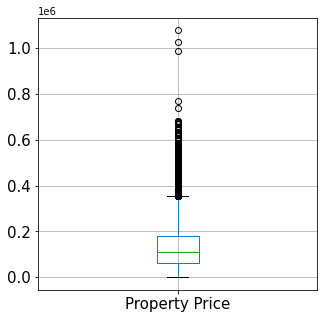

In [25]:
df.boxplot(column = "Property Price", fontsize=15, figsize=(5,5))


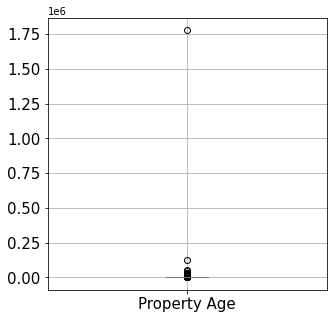

In [26]:
df.boxplot(column = "Property Age", fontsize=15, figsize=(5,5))


# Data Cleaning

In [27]:
#As we can see there are LSA missing values, so we need to first get rid of them, since comparing to 30k , 395 is merely 1% , so we will just remove them
df = df[df['Loan Sanction Amount (USD)'].isna()==False]
df.reset_index(drop=True,inplace=True)

In [28]:
df.shape

(29660, 24)

In [37]:
df_non_numeric = df.select_dtypes(exclude=[np.number])
non_numeric_cols = df_non_numeric.columns.values

In [38]:
non_numeric_cols

array(['Customer ID', 'Name', 'Gender', 'Income Stability', 'Profession',
       'Type of Employment', 'Location', 'Expense Type 1',
       'Expense Type 2', 'Has Active Credit Card', 'Property Location'],
      dtype=object)

In [30]:
df_numeric = df.select_dtypes(include=[np.number])
numeric_cols = df_numeric.columns.values

In [31]:
numeric_cols

array(['Age', 'Income (USD)', 'Loan Amount Request (USD)',
       'Current Loan Expenses (USD)', 'Dependents', 'Credit Score',
       'No. of Defaults', 'Property ID', 'Property Age', 'Property Type',
       'Co-Applicant', 'Property Price', 'Loan Sanction Amount (USD)'],
      dtype=object)

## Impute the missing values and create the missing value indicator variables for each numeric column.

In [32]:
#removing dependents and credit score from numeric cols because , 
#mode and mean would be better for dependent and credit score respectively 
numeric_cols = np.delete(numeric_cols,4)
numeric_cols = np.delete(numeric_cols,4)


In [33]:
numeric_cols

array(['Age', 'Income (USD)', 'Loan Amount Request (USD)',
       'Current Loan Expenses (USD)', 'No. of Defaults', 'Property ID',
       'Property Age', 'Property Type', 'Co-Applicant', 'Property Price',
       'Loan Sanction Amount (USD)'], dtype=object)

In [34]:
for col in numeric_cols:
    missing = df[col].isnull()
    num_missing = np.sum(missing)
    
    if (num_missing > 0 ):
        # only do the imputation for the columns that have missing values.
      print('imputing missing values for: {}'.format(col))
      med = df[col].median()
      print(med)
      df[col] = df[col].fillna(med)

imputing missing values for: Income (USD)
2223.3
imputing missing values for: Current Loan Expenses (USD)
375.09
imputing missing values for: Property Age
2223.965


## Seperately filling values for dependents and credit score

In [35]:
print('imputing missing values for: {}'.format('Dependents'))
        
df['Dependents'] = df['Dependents'].fillna(df["Dependents"].mode().values[0])     
 
print('imputing missing values for: {}'.format('Credit Score'))
        
avg = df['Credit Score'].mean() # impute with the average value.
df['Credit Score'] = df['Credit Score'].fillna(avg)

imputing missing values for: Dependents
imputing missing values for: Credit Score


## Impute the missing values and create the missing value indicator variables for each non numeric column.

In [39]:
for col in non_numeric_cols:
    missing = df[col].isnull()
    num_missing = np.sum(missing)
    
    if num_missing > 0:  # only do the imputation for the columns that have missing values.
        print('imputing missing values for: {}'.format(col))
      
        
        top = df[col].describe()['top'] # impute with the most frequent value.
        df[col] = df[col].fillna(top)

imputing missing values for: Gender
imputing missing values for: Income Stability
imputing missing values for: Type of Employment
imputing missing values for: Has Active Credit Card
imputing missing values for: Property Location


In [40]:
# Number of distinct values in variables
for i, column in enumerate(df.columns):
    print("{}. ".format(i) + str(column.title()) + ": {}". format(df[column].nunique()))

0. Customer Id: 29660
1. Name: 29660
2. Gender: 2
3. Age: 48
4. Income (Usd): 24187
5. Income Stability: 2
6. Profession: 8
7. Type Of Employment: 18
8. Location: 3
9. Loan Amount Request (Usd): 29642
10. Current Loan Expenses (Usd): 23816
11. Expense Type 1: 2
12. Expense Type 2: 2
13. Dependents: 10
14. Credit Score: 17478
15. No. Of Defaults: 2
16. Has Active Credit Card: 3
17. Property Id: 999
18. Property Age: 23945
19. Property Type: 4
20. Property Location: 3
21. Co-Applicant: 3
22. Property Price: 29303
23. Loan Sanction Amount (Usd): 21450


In [41]:
loan_initial =df.drop(["Customer ID","Name","Property ID","Gender"],axis=1)
#"Credit Score",,"Property Age",,"Loan Amount Request (USD),"Current Loan Expenses (USD)""

### Adding dummy values for No. of defaults, Co-applicant, Property type

In [42]:
#one hot encoding
loan_initial = pd.get_dummies(loan_initial,columns=["No. of Defaults", "Property Type", "Co-Applicant"],drop_first=True)

In [43]:
#one hot encoding
loan_initial = pd.get_dummies(loan_initial,columns=["Income Stability","Location" , "Expense Type 1", "Expense Type 2", "Has Active Credit Card","Property Location"],drop_first=True)
#"Expense Type 1", "Expense Type 2"

### Label Encoding

In [44]:
#label encoding for Type of Employment
loan_initial["Type of Employment"] = loan_initial["Type of Employment"].astype("category")
loan_initial["Type of Employment"] = loan_initial["Type of Employment"].cat.codes

In [45]:
#label encoding for Profession column
loan_initial["Profession"] = loan_initial["Profession"].astype("category")
loan_initial["Profession"] = loan_initial["Profession"].cat.codes

#Preparing Data for Training

---



In [46]:
y = loan_initial['Loan Sanction Amount (USD)']

In [47]:
x = loan_initial.drop(["Loan Sanction Amount (USD)"],axis=1)

In [48]:
from sklearn.model_selection import train_test_split
 
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.55, random_state=125)

#Linear Regression

In [49]:
from sklearn.linear_model import LinearRegression

lm = LinearRegression()

lm.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [50]:
predictions = lm.predict( X_test)


In [51]:
#old value .562345654322,    0.6251343978248718
from sklearn.metrics import r2_score

r2_score(y_test, predictions) #ratio: variance explained by the model/total variance of the data

0.6314954392586951

#Random Forest

In [52]:
from sklearn.ensemble import RandomForestRegressor


In [53]:
rfc = RandomForestRegressor()

In [54]:
rfc.fit(X_train,y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [55]:
pred_rf = rfc.predict(X_test)


In [56]:

r2_score(y_test, pred_rf)


0.7556705609733052

#Bayesian Regression 

In [59]:
#old value = 0.5664
from sklearn import linear_model
reg = linear_model.BayesianRidge()
reg.fit(X_train, y_train)
predic = reg.predict(X_test)
accuracy = r2_score(y_test,predic)
print(np.round(accuracy,decimals=4))

0.6313


# XGBoost Regression 

In [60]:
import xgboost as xgb

In [61]:
xgbr = xgb.XGBRegressor(verbosity=0) 

In [62]:
xgbr.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=0)

In [63]:
score = xgbr.score(X_train, y_train) 

In [64]:
print("Training score: ", score)

Training score:  0.7987835794066295


# Lasso regression 


In [65]:
from sklearn.linear_model import Lasso

In [66]:
lasso_reg = Lasso(normalize=True)

In [67]:
lasso_reg.fit(X_train,y_train)

Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000, normalize=True,
      positive=False, precompute=False, random_state=None, selection='cyclic',
      tol=0.0001, warm_start=False)

In [68]:
y_pred_lass =lasso_reg.predict(X_test)

In [69]:
r2_score(y_test, y_pred_lass)

0.6343803090006537